In [85]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct file path
dataset_path = "/kaggle/input/electricity-demands"
file_name = "electricity.csv"
file_path = os.path.join(dataset_path, file_name)

# Load the dataset
data = pd.read_csv(file_path)

# Display dataset preview
print("Dataset Preview:")
print(data.head())

# Display dataset shape and info
print("\nDataset Shape:", data.shape, "\n")
data.info()

# Condensed missing values check
print("\nMissing Values:")
print(data.isnull().sum().to_string())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe().to_string())


Dataset Preview:
   date   day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0  b'2'  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0  b'2'  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0  b'2'  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0  b'2'  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0  b'2'  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

     class  
0    b'UP'  
1    b'UP'  
2    b'UP'  
3    b'UP'  
4  b'DOWN'  

Dataset Shape: (45312, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  object 
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice

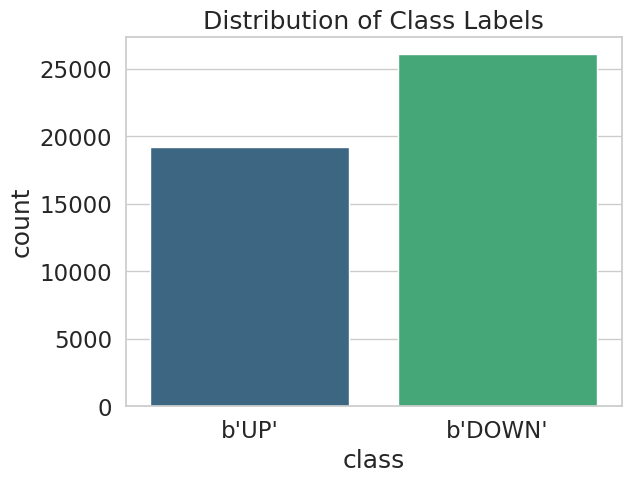

In [86]:
sns.countplot(data=data, x="class", palette="viridis")
plt.title("Distribution of Class Labels")
plt.show()


In [87]:
# Identifying the  non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", list(non_numeric_cols))


Non-Numeric Columns: ['day', 'class']


In [98]:
# trying to do a heatmap and day/class values are showing up as non-numeric bc of the 'b' in front of them..
# going to 'problem-solve' by trying to code and take the b from off the front
# day will be easy, but class which just represent up/down will need to be changed to bool values
# Convert byte strings to normal strings
# Convert "class" and "day" from byte strings to normal strings

#data["class"] = data["class"].astype(str).str.strip("b'").astype("category").cat.codes
data["day"] = data["day"].astype(str).str.strip("b'").astype("category").cat.codes
data["class"] = data["class"].astype(str).str.strip("b'").map({"UP": 1, "DOWN": 0})


# boolean values assigned to class bc these are either UP/DOWN
# days are assigned multiple values so these need to use cat.codes (unique categories)

In [89]:
# Converts to number
data["day"] = pd.to_numeric(data["day"], errors="coerce")  


In [90]:
# Converts 'UP'/'DOWN' to 0/1
data["class"] = data["class"].astype("category").cat.codes  

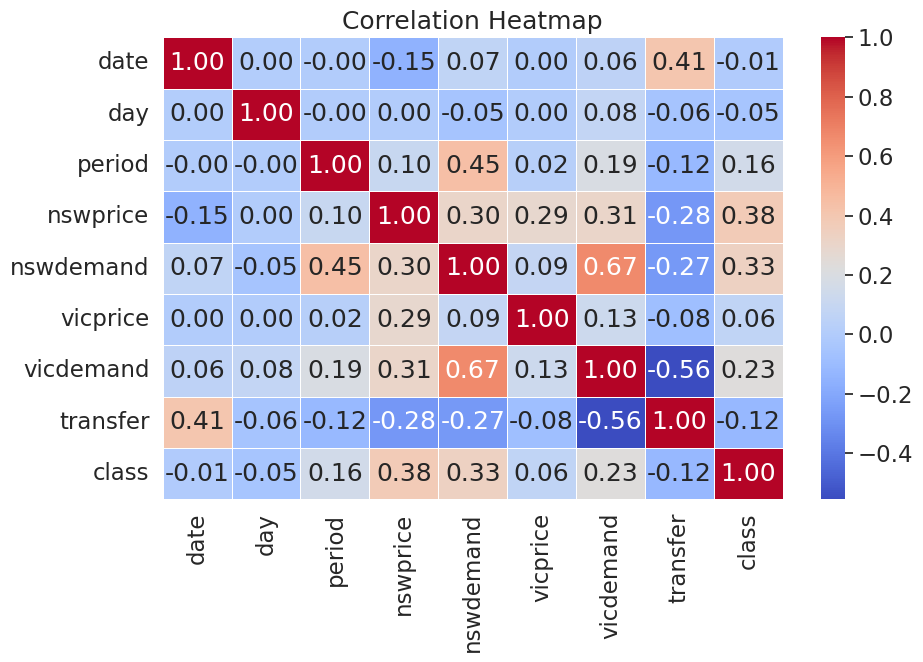

In [91]:
# rerun the heatmap...
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


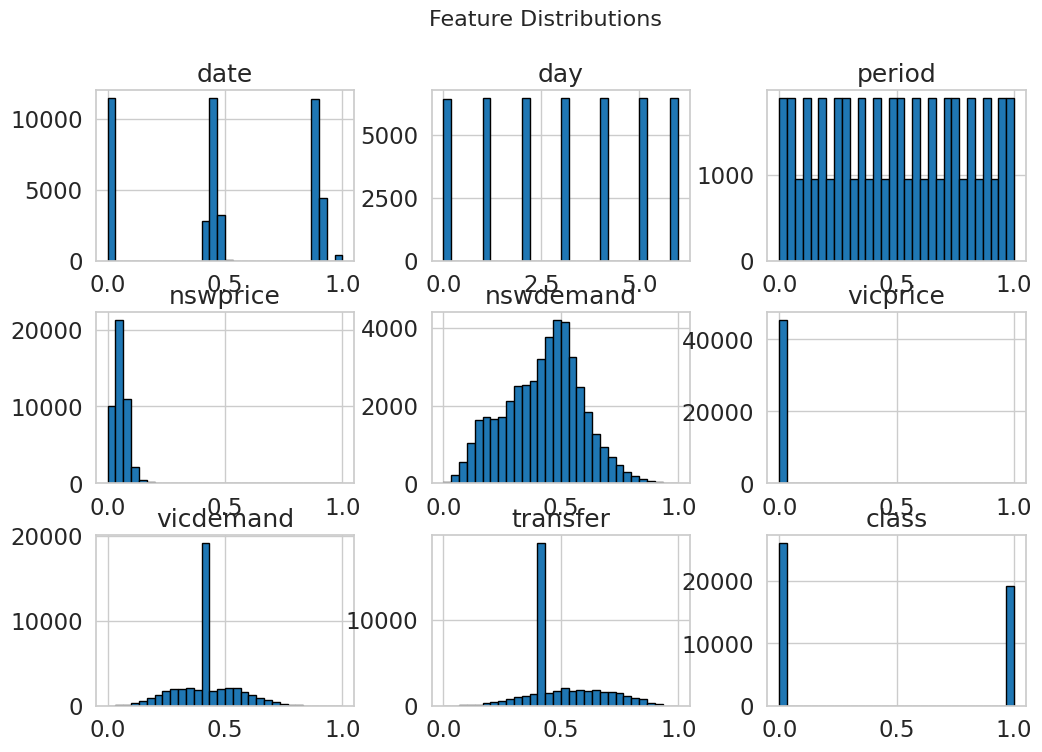

In [92]:
data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


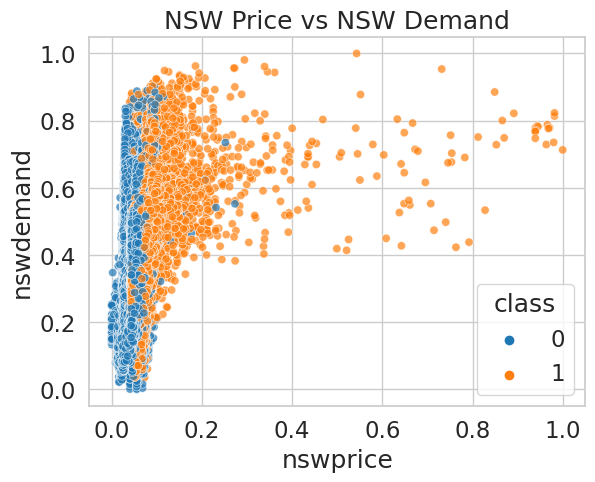

In [93]:
sns.scatterplot(data=data, x="nswprice", y="nswdemand", hue="class", alpha=0.7)
plt.title("NSW Price vs NSW Demand")
plt.show()


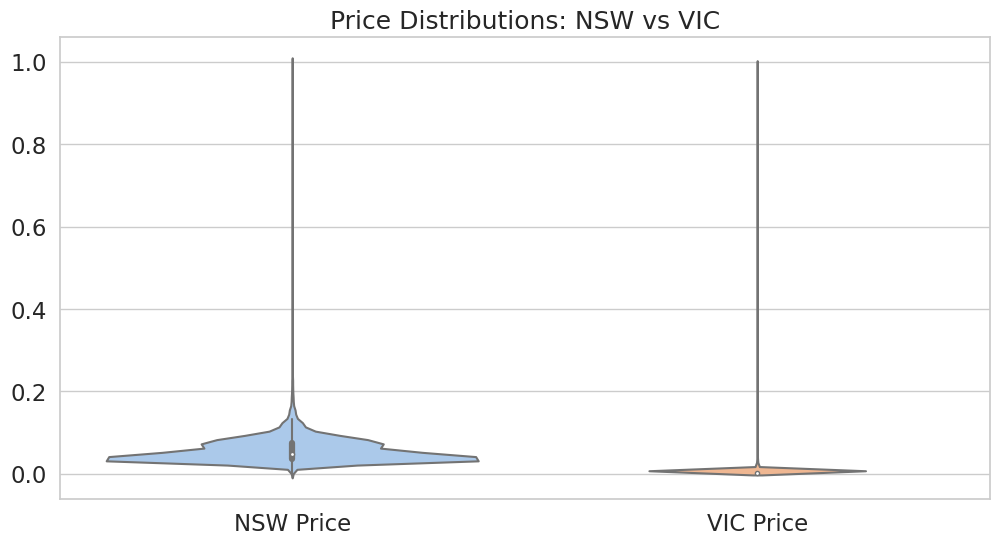

In [94]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[["nswprice", "vicprice"]], palette="pastel")
plt.title("Price Distributions: NSW vs VIC")
plt.xticks(ticks=[0, 1], labels=["NSW Price", "VIC Price"])
plt.show()


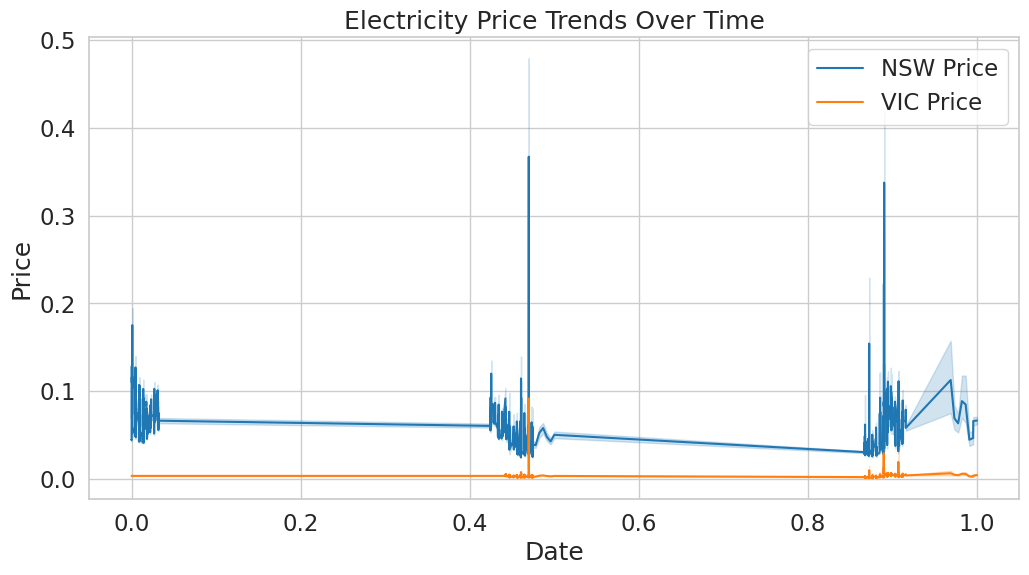

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="date", y="nswprice", label="NSW Price")
sns.lineplot(data=data, x="date", y="vicprice", label="VIC Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Electricity Price Trends Over Time")
plt.legend()
plt.show()


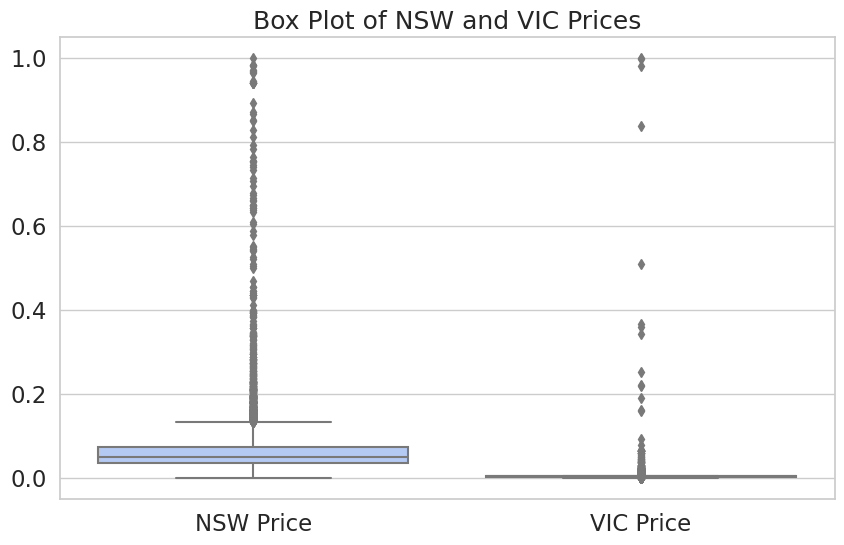

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["nswprice", "vicprice"]], palette="coolwarm")
plt.title("Box Plot of NSW and VIC Prices")
plt.xticks(ticks=[0, 1], labels=["NSW Price", "VIC Price"])
plt.show()
